In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('./data/brilliance_2.csv')
print(df.shape)
df.drop('Unnamed: 0',axis=1,inplace=True)

(23343, 19)


# Data Cleaning

In [3]:
df = df.drop_duplicates()

In [4]:
df.columns

Index(['Shape', 'Carat Weight', 'Color', 'Clarity', 'Cut', 'Certification',
       'Depth %', 'Table %', 'Polish', 'Symmetry', 'Cut Grade', 'Measurements',
       'Length to Width', 'Girdle', 'Culet', 'Fluorescence', 'Stock Number',
       'Price'],
      dtype='object')

In [5]:
# fix price formatting
df['Price'] = df['Price'].map(lambda x: x.replace('$',''))
df['Price'] = df['Price'].map(lambda x: x.replace(',',''))
df['Price'] = df['Price'].astype(int)

In [6]:
df['Price'].dtypes

dtype('int64')

In [7]:
df.sort_values(['Price'], inplace = True)
df.head(2)

,Shape,Carat Weight,Color,Clarity,Cut,Certification,Depth %,Table %,Polish,Symmetry,Cut Grade,Measurements,Length to Width,Girdle,Culet,Fluorescence,Stock Number,Price
2415,Round,0.30 ct.,K,SI1,Ideal,GIA,62.8 %,55 %,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.0,Medium - Sl. Thick,None,Faint,D113696493,314
5629,Round,0.32 ct.,K,SI2,Super Ideal,GIA,61.0 %,59 %,Excellent,Excellent,Excellent,4.44x4.42x2.7 mm,1.0,NaN,None,Strong,D113705055,317


<AxesSubplot:xlabel='Price', ylabel='Count'>

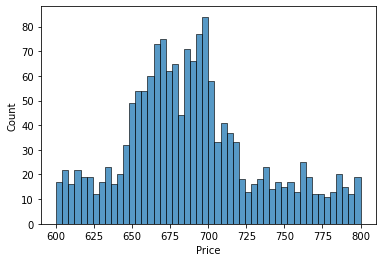

In [8]:
# excess amount of samples between $600 and $800 -- deal with later
sns.histplot(data=df,x='Price',bins=50,binrange=(600,800))

<AxesSubplot:xlabel='Price', ylabel='Count'>

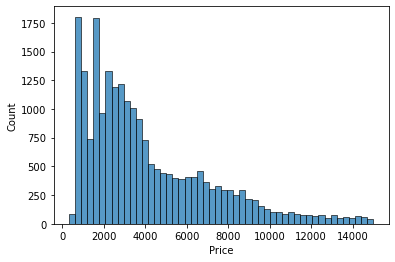

In [9]:
sns.histplot(data=df,x='Price',bins=50)

In [10]:
# drop two columns
df.drop(['Shape','Certification'],axis=1,inplace=True)

In [11]:
df['Carat Weight'] = df['Carat Weight'].map(lambda x: x.replace('ct.',''))
df['Carat Weight'] = df['Carat Weight'].astype(float)

In [12]:
df[['Depth %', 'Table %']] = df[['Depth %', 'Table %']].apply(lambda x: x.str.replace('%','').str.strip()).astype(float)
df.head()

,Carat Weight,Color,Clarity,Cut,Depth %,Table %,Polish,Symmetry,Cut Grade,Measurements,Length to Width,Girdle,Culet,Fluorescence,Stock Number,Price
2415,0.30,K,SI1,Ideal,62.8,55.0,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.00,Medium - Sl. Thick,None,Faint,D113696493,314
5629,0.32,K,SI2,Super Ideal,61.0,59.0,Excellent,Excellent,Excellent,4.44x4.42x2.7 mm,1.00,NaN,None,Strong,D113705055,317
5630,0.25,K,VS2,Good,58.1,63.0,Very Good,Good,Very Good,4.18x4.22x2.44 mm,1.01,V. Thin - Sl. Thick,None,None,D15743699,322
4192,0.30,K,SI1,Super Ideal,62.4,54.0,Excellent,Very Good,Excellent,4.28x4.29x2.67 mm,1.00,Medium - Sl. Thick,None,None,D113588305,323
5632,0.30,K,SI1,Super Ideal,62.6,56.0,Excellent,Excellent,Excellent,4.29x4.31x2.69 mm,1.00,Thin - Sl. Thick,None,Faint,D113588445,326


In [13]:
print(df['Color'].value_counts(),'\n')
color_d = {'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7,'K':8}
df['Color'] = df['Color'].map(color_d)
print(df['Color'].value_counts())

D    4313
E    3639
F    3343
G    3127
H    2450
I    2041
J    1951
K    1346
Name: Color, dtype: int64 

1    4313
2    3639
3    3343
4    3127
5    2450
6    2041
7    1951
8    1346
Name: Color, dtype: int64


In [14]:
print(df['Clarity'].value_counts(),'\n')
clar_d = {'FL':1,'IF':2,'VVS1':3,'VVS2':4,'VS1':5,'VS2':6,'SI1':7,'SI2':8}
df['Clarity'] = df['Clarity'].map(clar_d)
print(df['Clarity'].value_counts(),'\n')

VS1     4814
VS2     4356
VVS2    3670
SI1     3123
VVS1    2596
SI2     2064
IF      1434
FL       153
Name: Clarity, dtype: int64 

5    4814
6    4356
4    3670
7    3123
3    2596
8    2064
2    1434
1     153
Name: Clarity, dtype: int64 



In [15]:
print(df['Cut'].value_counts(),'\n')
cut_d = {'Super Ideal':1, 'Ideal':2,'Excellent':3,'Very Good':4, 'Good':4}
df['Cut'] = df['Cut'].map(cut_d)
print(df['Cut'].value_counts(),'\n')

Super Ideal    15055
Ideal           3007
Excellent       2166
Very Good       1700
Good             282
Name: Cut, dtype: int64 

1    15055
2     3007
3     2166
4     1982
Name: Cut, dtype: int64 



In [16]:
print(df['Polish'].value_counts(),'\n')
pol_d = {'Excellent':1,'Very Good':2,'Good':3}
df['Polish'] = df['Polish'].map(pol_d)
print(df['Polish'].value_counts())

Excellent    20629
Very Good     1513
Good            68
Name: Polish, dtype: int64 

1    20629
2     1513
3       68
Name: Polish, dtype: int64


In [17]:
print(df['Symmetry'].value_counts(),'\n')
sym_d = {'Excellent':1,'Very Good':2,'Good':3}
df['Symmetry'] = df['Symmetry'].map(sym_d)
print(df['Symmetry'].value_counts())

Excellent    17431
Very Good     4236
Good           543
Name: Symmetry, dtype: int64 

1    17431
2     4236
3      543
Name: Symmetry, dtype: int64


In [18]:
print(df['Culet'].value_counts(),'\n')
culet_d = {'None':1, 'Very Small':2,'Small':3,'Medium':4}
df['Culet'] = df['Culet'].map(culet_d)
df['Culet'].fillna(value=.01, inplace = True)
df['Culet'] = df['Culet'].astype(float)
print(df['Culet'].value_counts())

None          18657
Very Small       89
Small            14
Medium            4
Name: Culet, dtype: int64 

1.00    18657
0.01     3446
2.00       89
3.00       14
4.00        4
Name: Culet, dtype: int64


In [19]:
print(df['Fluorescence'].value_counts(),'\n')
flo_d = {'None':1,'Faint':2,'Medium':3,'Strong':4}
df['Fluorescence'] = df['Fluorescence'].map(flo_d)
print(df['Fluorescence'].value_counts(),'\n')

None      14698
Faint      4060
Medium     2219
Strong     1233
Name: Fluorescence, dtype: int64 

1    14698
2     4060
3     2219
4     1233
Name: Fluorescence, dtype: int64 



In [20]:
df_idk = df[['Cut Grade','Girdle', 'Measurements', 'Stock Number']]
df.drop(['Cut Grade','Girdle','Measurements','Stock Number'],axis=1,inplace=True)
df.head(2)

,Carat Weight,Color,Clarity,Cut,Depth %,Table %,Polish,Symmetry,Length to Width,Culet,Fluorescence,Price
2415,0.30,8,7,2,62.8,55.0,1,2,1.0,1.0,2,314
5629,0.32,8,8,1,61.0,59.0,1,1,1.0,1.0,4,317


In [21]:
df.drop(df[df['Price'] < 500].index, inplace = True)

In [22]:
df.to_csv('./data/forblue_brilliance_eda.csv',index=False)

# Basic Feature 'Engineering'

<AxesSubplot:xlabel='Carat Weight', ylabel='Price'>

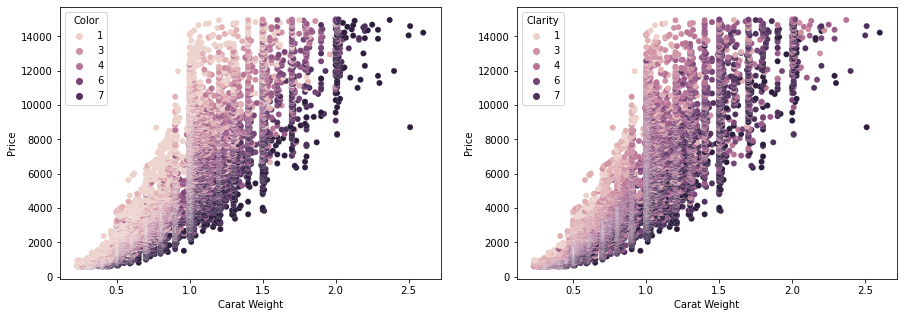

In [23]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.scatterplot(ax=ax[0],data=df,x='Carat Weight',y='Price',hue='Color',linewidth=.1)
sns.scatterplot(ax=ax[1],data=df,x='Carat Weight',y='Price',hue='Clarity',linewidth=.1)
#sns.scatterplot(ax=ax[1][0],data=df,x='Carat Weight',y='Price',hue='Cut',linewidth=.1)
#sns.scatterplot(ax=ax[1][1],data=df,x='Carat Weight',y='Price',hue='Fluorescence',linewidth=.1)

In [24]:
df.dtypes

Carat Weight       float64
Color                int64
Clarity              int64
Cut                  int64
Depth %            float64
Table %            float64
Polish               int64
Symmetry             int64
Length to Width    float64
Culet              float64
Fluorescence         int64
Price                int64
dtype: object

In [25]:
df['FourC'] = df['Carat Weight'] * df['Color'] * df['Clarity'] * df['Cut']
df['DT Ratio'] = df['Depth %'] / df['Table %']
df['Carat Color'] = df['Color'] ** (df['Carat Weight'])
df['Carat Clarity'] = df['Clarity'] ** (df['Carat Weight'])
df['Shine'] = df['Polish'] * df['Symmetry'] * df['Fluorescence']

In [26]:
df.corr().loc['Price']

Carat Weight       0.871851
Color              0.051095
Clarity           -0.013554
Cut               -0.090871
Depth %           -0.011250
Table %            0.042624
Polish            -0.093121
Symmetry          -0.109452
Length to Width   -0.041747
Culet              0.151877
Fluorescence       0.026163
Price              1.000000
FourC              0.201083
DT Ratio          -0.034712
Carat Color        0.417253
Carat Clarity      0.538871
Shine             -0.065510
Name: Price, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22160 entries, 548 to 14510
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Carat Weight     22160 non-null  float64
 1   Color            22160 non-null  int64  
 2   Clarity          22160 non-null  int64  
 3   Cut              22160 non-null  int64  
 4   Depth %          22160 non-null  float64
 5   Table %          22160 non-null  float64
 6   Polish           22160 non-null  int64  
 7   Symmetry         22160 non-null  int64  
 8   Length to Width  22160 non-null  float64
 9   Culet            22160 non-null  float64
 10  Fluorescence     22160 non-null  int64  
 11  Price            22160 non-null  int64  
 12  FourC            22160 non-null  float64
 13  DT Ratio         22160 non-null  float64
 14  Carat Color      22160 non-null  float64
 15  Carat Clarity    22160 non-null  float64
 16  Shine            22160 non-null  int64  
dtypes: float64

In [28]:
df = df[df['Price'] < 13001]

In [29]:
df.to_csv('./data/forblue_brilliance_eda_new_features.csv',index=False)